<a href="https://colab.research.google.com/github/andluizsouza/Machine-Learning-tutorials/blob/master/4-Intro_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands on the NLP project**

Vamos criar um modelo de ML para classificação de sentimentos: 
> a pessoa gostou ou não gostou daquele filme/notícia/música?

Importando o dataset: resenha sobre filmes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
dir_data = '/content/drive/My Drive/Colab Notebooks/Machine Learning - Alura Tech/Dataset/Lecture 2.1/'
movies_report = pd.read_csv(dir_data+'imdb-reviews-pt-br.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
movies_report.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
movies_report.tail()

,id,text_en,text_pt,sentiment
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos


Definindo o sentimento/classificação como uma variável binária: 0, 1

In [ ]:
sentiment_bin = movies_report['sentiment'].replace(['neg', 'pos'], [0,1])
movies_report['sentiment_bin'] = sentiment_bin

## **Text normalization**

### **Removing accentuation**

Removendo os acentos das palavras nas resenhas

In [ ]:
!pip install unidecode
import unidecode
movies_report['text_pt_normal'] = [unidecode.unidecode(text) for text in
                                                     movies_report['text_pt']]                                                     

     |████████████████████████████████| 245kB 3.5MB/s 


### **Lower case**

Todas as palavras em letras minúsculas

In [ ]:
movies_report['text_pt_normal']  = [text.lower() for text in movies_report['text_pt_normal']]

## **Count Vectorizer**

> Como classificar um sentimento por linguagem textual?


 * Precisamos converter o texto (conjunto de strings) em números. Como?
 1. Criando um vocabulário geral que represente bem todo a amostra
 2. Contar quantas vezes cada palavra do vocabulário aparece naquele texto e construir um vetor de contagem
 3. Modelar a relação entre os vetores de contagem com as targets: avaliação positiva ou negativa

In [ ]:
def BagOfWords_CountVector(text_all, max_features=100):

  from sklearn.feature_extraction.text import CountVectorizer

  vectorizer = CountVectorizer(lowercase=True, max_features=max_features)
  bag_matrix = vectorizer.fit_transform(text_all)
  bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_matrix, columns=vectorizer.get_feature_names())

  return bag_of_words

In [ ]:
bag_of_words = BagOfWords_CountVector(movies_report['text_pt_normal'])
bag_of_words.head()

,ainda,algumas,alguns,anos,ao,apenas,as,assistir,ate,bem,bom,coisa,com,como,da,das,de,depois,dizer,do,dos,ela,ele,eles,em,enredo,entao,era,esse,esta,estava,este,eu,faz,fazer,filme,filmes,final,foi,grande,...,para,parece,parte,pelo,personagens,pessoas,pode,poderia,por,porque,pouco,qualquer,quando,que,realmente,sao,se,sem,ser,seu,seus,sobre,sua,suas,tambem,tao,tem,tempo,ter,the,todo,todos,tudo,um,uma,ver,vez,vi,vida,voce
0,0,0,0,0,1,0,0,0,1,1,0,0,2,1,0,2,4,1,0,4,2,0,1,0,0,0,0,1,0,0,0,0,3,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,2,0,0,1,2,7,0,0,0,1,1,2,0,1,0,0,0,0,1,1,0,0,0,0,1,3,2,0,1,0,0,0
1,1,0,0,0,0,0,0,3,0,2,0,1,2,0,0,0,7,0,0,1,3,0,1,0,3,0,0,1,2,0,1,3,2,1,0,4,3,0,1,0,...,2,0,0,2,0,0,0,0,1,0,1,0,0,10,1,2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,5,2,4,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,10,0,0,2,0,0,0,2,1,1,0,0,0,2,0,0,2,0,0,3,0,0,0,1,...,1,0,1,0,1,1,0,0,2,0,0,0,1,8,0,3,1,4,0,0,0,0,0,1,1,1,1,0,0,0,1,1,2,3,2,0,1,0,0,2
3,1,0,0,1,0,1,4,0,2,1,0,0,7,2,1,0,13,0,0,3,1,0,1,2,6,0,1,1,1,0,1,3,10,0,0,4,2,0,1,0,...,4,0,0,0,1,0,0,0,1,0,0,0,2,7,0,2,3,0,0,0,0,0,0,1,0,0,1,1,1,0,1,2,0,7,4,1,0,1,0,1
4,0,1,0,0,0,1,2,1,0,1,0,0,3,0,1,0,16,0,0,2,1,4,0,2,2,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,...,5,0,0,1,0,0,0,0,0,0,0,0,0,4,2,4,1,1,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,3,4,0,0,0,0,0


### **Logistic Regression**

Treinamento supervisionado (target = sentimento) utilizando o modelo de regressão logística (target binaria)

In [ ]:
def npl_score(bag_of_words, target_selection):

  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression

  x_train, x_test, y_train, y_test = train_test_split(
      bag_of_words, target_selection, train_size=0.75, random_state=0)

  logistic_model = LogisticRegression()
  logistic_model.fit(x_train, y_train)
  score = logistic_model.score(x_test, y_test)

  return score

In [ ]:
score_0 = npl_score(bag_of_words, movies_report['sentiment_bin'])
print(score_0)

0.714678528103518


**Como melhorar essa modelagem?**
* As 100 palavras mais frequentes são de fato as mais relevantes para a classificação de sentimento?
* Provavelmente não...

## **Word Cloud**

A visualização gráfica das palavras mais frequentes

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

Juntar todas as palavras das resenhas com a mesma target

In [ ]:
def wordcloud_plot(report, text_column, query_cond):

  report_select = report.query(query_cond)
  all_words = ' '.join([text for text in report_select[text_column]])

  cloud = WordCloud(
    width=800, height=400, max_font_size=110, collocations=False).generate(all_words)
  
  %matplotlib inline
  import matplotlib.pyplot as plt
  plt.figure(figsize=(12,8))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

  return

Word Cloud com as palavras mais frequentes nas resenhas positivas

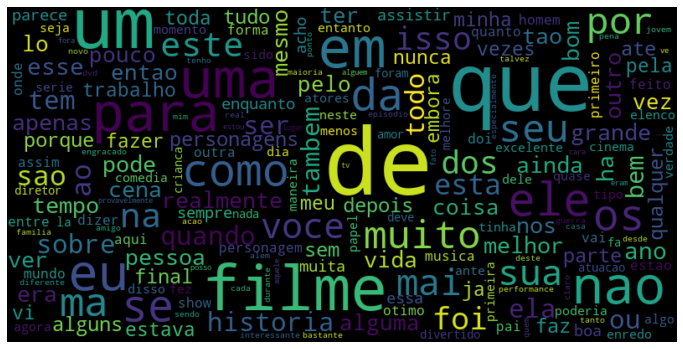

In [ ]:
wordcloud_plot(movies_report, 'text_pt_normal', 'sentiment_bin==1')

Word Cloud com as palavras mais frequentes nas resenhas negativas

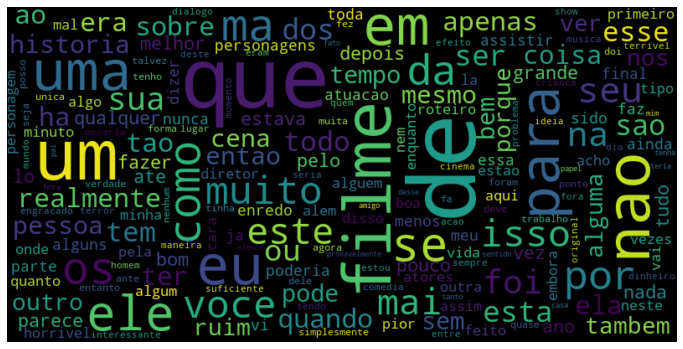

In [ ]:
wordcloud_plot(movies_report, 'text_pt_normal', 'sentiment_bin==0')

## **Stop words**

Entretanto, continuamos com o mesmo problema: as palavras mais frequentes não agregam sentido e não nos ajudam a prever o sentimento/avaliação sobre filme. Como removê-las?

A livraria NLTK já tem uma lista dessas palavras "inúteis": as **_stop words_**

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera'

Removendo acentuação

In [ ]:
stop_words = [unidecode.unidecode(word) for word in stop_words]

Adicionando caracteres de pontuação

In [ ]:
from string import punctuation
punct = list()
for i in punctuation:
  punct.append(i)
print(punct)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
stop_words += punct
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estiv

## **Tokenizer**

Analisando cada palavra de todos os comentários: separando por palavra e pontuação

### **Removing stop words**

In [ ]:
def remove_stopwords(text_all, stop_words):

  from nltk import tokenize
  token_WP = tokenize.WordPunctTokenizer()
  
  # All final texts without stop words
  text_all_final = list()

  for text in text_all:
    # Getting each word/punctuation from the text
    words_text = token_WP.tokenize(text)
    # The new text without these stop_words
    new_text = list()
    for word in words_text:
      if word not in stop_words:
        new_text.append(word)
    text_all_final.append(' '.join(new_text))

  return text_all_final

In [ ]:
movies_report['text_pt_no_stopwords'] = remove_stopwords(movies_report['text_pt_normal'], stop_words)

### **New word clouds**

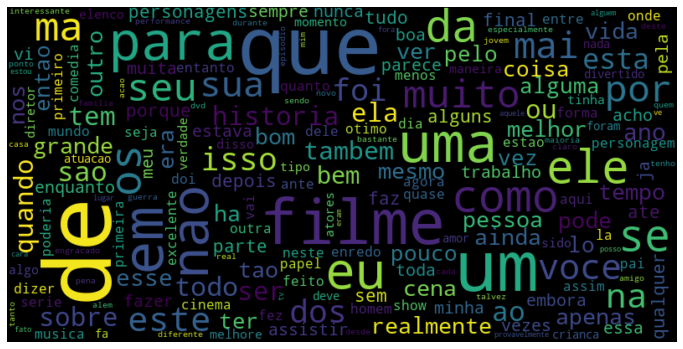

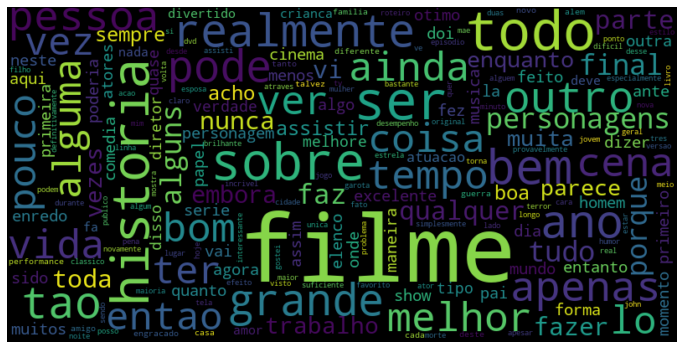

In [ ]:
wordcloud_plot(movies_report, 'text_pt_normal', 'sentiment_bin==1')
wordcloud_plot(movies_report, 'text_pt_no_stopwords', 'sentiment_bin==1')

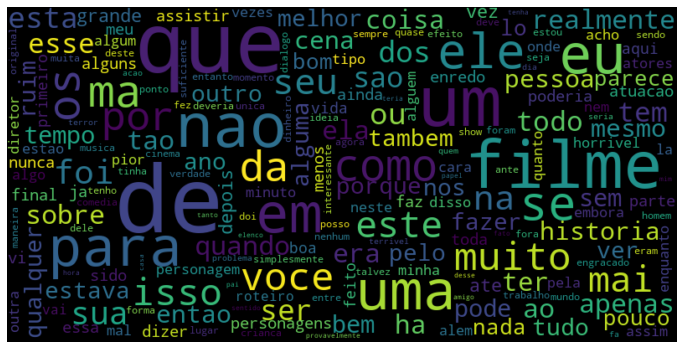

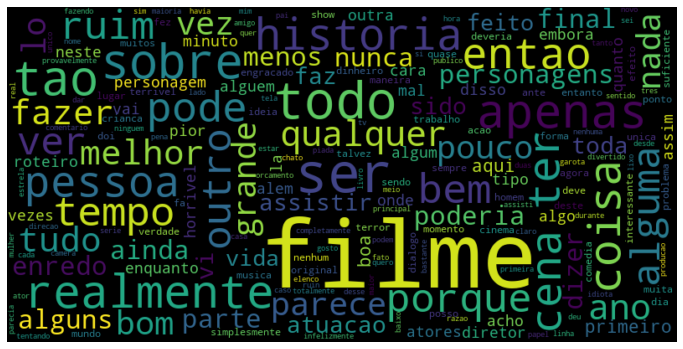

In [ ]:
wordcloud_plot(movies_report, 'text_pt_normal', 'sentiment_bin==0')
wordcloud_plot(movies_report, 'text_pt_no_stopwords', 'sentiment_bin==0')

In [ ]:
bag_no_stopwords = BagOfWords_CountVector(movies_report['text_pt_no_stopwords'])
score_1 = npl_score(bag_no_stopwords, movies_report['sentiment_bin'])

### **Score removing stop words**

In [ ]:
print('Score from the original text:', score_0.round(5))
print('Score removing stopwords:', score_1.round(5))

Score from the original text: 0.71468
Score removing stopwords: 0.71702


## **Stemmer**